## Importing of Necessary Libraries

In [ ]:
!pip install fastai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from fastai.vision.all import *
from fastai.vision import *
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
import os

# No need to reload the notebook if any change in the fastai library
%reload_ext autoreload
%autoreload 2

# Display images in the notebook
%matplotlib inline

## Dataset Loading

In [ ]:
#@markdown <br><center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/da/Google_Drive_logo.png/600px-Google_Drive_logo.png' height="150" alt="Gdrive-logo"/></center>
#@markdown <center><h2>Mount GDrive to /content/drive</h3></center><br>
MODE = "MOUNT" #@param ["MOUNT", "UNMOUNT"]
#Mount your Gdrive!
from google.colab import drive
drive.mount._DEBUG = False
if MODE == "MOUNT":
  drive.mount('/content/drive', force_remount=True)
elif MODE == "UNMOUNT":
  try:
    drive.flush_and_unmount()
  except ValueError:
    pass
  get_ipython().system_raw("rm -rf /root/.config/Google/DriveFS")

Mounted at /content/drive


In [ ]:
# Package to have access to the Zindi Platform features
!pip -q install git+https://github.com/eaedk/testing-zindi-package.git
from zindi.user import Zindian
#@title Input Username

# Login info for a Zindi Account

USERNAME = "D-PROF" #@param {type : "string"}
# object
user = Zindian(username=USERNAME) # Sign in
user.select_a_challenge(reward='all', kind='Hackathon', active='true')
user.which_challenge
user.download_dataset(destination="dataset") # Download the dataset of the selected challenge


Your password
>> ··········

[ 🟢 ] 👋🏾👋🏾 Welcome D-PROF 👋🏾👋🏾

__________________________________________________________________________________________________________________________________
|     |              |                  |                    |          
|index|  challenge   |     problem      |       reward       |    id    
|     |              |                  |                    |          
----------------------------------------------------------------------------------------------------------------------------------
|  0  | Public Hack  |  Classification  |      $300 USD      | wadhwani-ai-bollworm-classification-challenge...
----------------------------------------------------------------------------------------------------------------------------------
|  1  | Private Hack |    Prediction    |     $5 000 USD     | umojahack-india-2022...
--------------------------------------------------------------------------------------------------------------------------------

dataset/SampleSubmission.csv: 100%|██████████| 27.9k/27.9k [00:00<00:00, 386ko/s]
dataset/Test.csv: 100%|██████████| 26.3k/26.3k [00:00<00:00, 366ko/s]
dataset/Train.csv: 100%|██████████| 64.7k/64.7k [00:00<00:00, 417ko/s]
dataset/images.zip: 100%|██████████| 6.08G/6.08G [02:57<00:00, 36.8Mo/s]
dataset/StarterNotebook.ipynb: 100%|██████████| 368k/368k [00:00<00:00, 1.21Mo/s]


In [ ]:
!unzip dataset/images.zip -d "dataset/Images"

Archive:  dataset/images.zip
  inflating: dataset/Images/id_71af263a5524d2b7a4ff4370.jpg  
  inflating: dataset/Images/id_3e009efd254f3e879a54c9c1.jpg  
  inflating: dataset/Images/id_9f0dfba1e093896e6f3a06ea.jpg  
  inflating: dataset/Images/id_31e7623d5c55f322f3bf6357.jpg  
  inflating: dataset/Images/id_6b65a04dda2bf63d93324f7e.jpg  
  inflating: dataset/Images/id_9f20bea39297263afd467f0b.jpg  
  inflating: dataset/Images/id_2f94ca56eac6e3c9208cd2aa.jpg  
  inflating: dataset/Images/id_a1a7eb030b0d30f64922af42.jpg  
  inflating: dataset/Images/id_a2c19c3a99331e9ba38e53cf.jpg  
  inflating: dataset/Images/id_2725edcf8b71ac3071fff326.jpg  
  inflating: dataset/Images/id_404ea81369dece717b3c3ee8.jpg  
  inflating: dataset/Images/id_51fdb42a55cd7581f42655bd.jpg  
  inflating: dataset/Images/id_1f2e25737c6d0d2262141ad0.jpg  
  inflating: dataset/Images/id_76b02f3ee529d14101116894.jpg  
  inflating: dataset/Images/id_811dc470cd8f75a10d4d384c.jpg  
  inflating: dataset/Images/id_e1f51aaf43

In [ ]:
sub = pd.read_csv('/content/dataset/SampleSubmission.csv')
sub.head()

,image_id,label
0,id_005102f664b820f778291dee.jpg,0
1,id_0066456f5fb2cd858c69ab39.jpg,0
2,id_007159c1fa015ba6f394deeb.jpg,0
3,id_00ba116c0f45a71a7e0e652c.jpg,0
4,id_00c11f7689e2351305cb12e3.jpg,0


In [ ]:
# path to the folder where the datasets are located in my google drive
path = '/content/dataset'

train = pd.read_csv(os.path.join(path, "/content/dataset/Train.csv"))

train_fnames = list(map(lambda x : os.path.join(path, "/content/dataset/Images/") + x, train['image_id']))
labels = train['label']

test = pd.read_csv(os.path.join(path, "/content/dataset/Test.csv"))
test_fnames = list(map(lambda x : os.path.join(path, "/content/dataset/Images/" + x), test['image_id']))

sub = pd.read_csv(os.path.join(path, "/content/dataset/SampleSubmission.csv"))

train.shape, test.shape, sub.shape

((1947, 2), (840, 1), (840, 2))

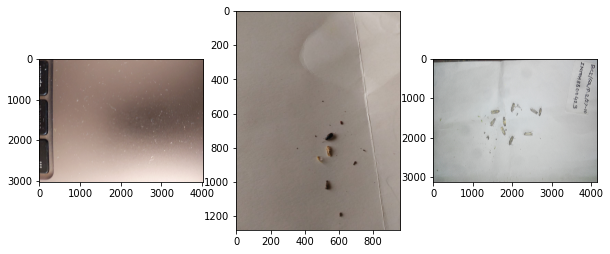

In [ ]:
#Sample Images
#Each image from the dataset has a dimension of 768 by 1024 and a color type of RGB
fig, axs = plt.subplots(1,3,figsize=(10,10))
for i, ax in enumerate(axs.flatten()):
    img = plt.imread(train_fnames[i])
    ax.imshow(img)
plt.show()

In [ ]:
#Transforming and augmenting images
img = PILImage(PILImage.create(img))

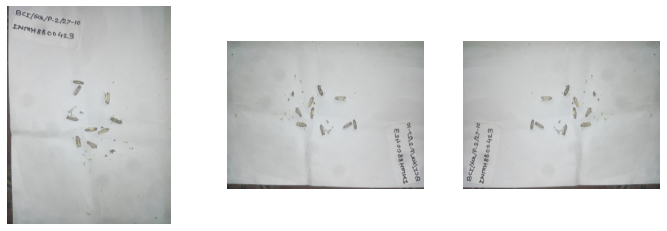

In [ ]:
tflip = FlipItem(p=1.)
bbox = TensorBBox(((tensor([[1.,0., 2.,1]]) -1)[None]))
test_eq(tflip(bbox,split_idx=0), tensor([[1.,0., 0.,1]]) -1)

_,axs = plt.subplots(1,3,figsize=(12,4))
for ax in axs.flatten():
    show_image(DihedralItem(p=1.)(img, split_idx=0), ctx=ax)

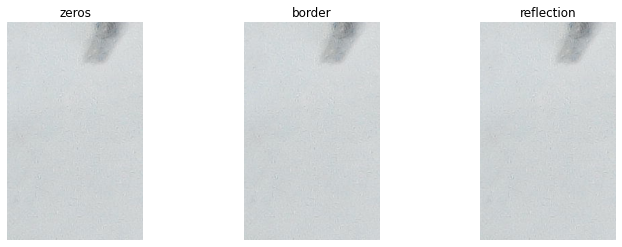

In [ ]:
_,axs = plt.subplots(1,3,figsize=(12,4))
for ax,mode in zip(axs.flatten(), [PadMode.Zeros, PadMode.Border, PadMode.Reflection]):
    show_image(img.crop_pad((200,320), pad_mode=mode), ctx=ax, title=mode);

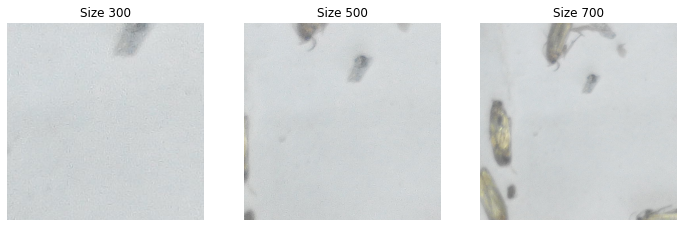

In [ ]:
_,axs = plt.subplots(1,3,figsize=(12,4))
for ax,sz in zip(axs.flatten(), [300, 500, 700]):
    show_image(img.crop_pad(sz), ctx=ax, title=f'Size {sz}');

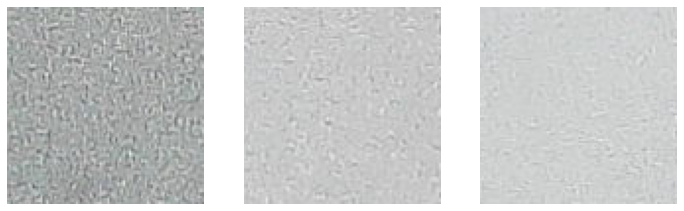

In [ ]:
_,axs = plt.subplots(1,3,figsize=(12,4))
f = RandomCrop(100)
for ax in axs: show_image(f(img), ctx=ax);

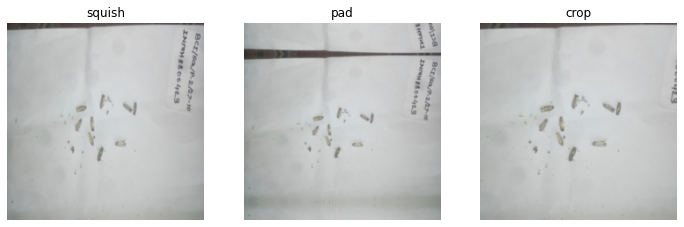

In [ ]:
_,axs = plt.subplots(1,3,figsize=(12,4))
for ax,method in zip(axs.flatten(), [ResizeMethod.Squish, ResizeMethod.Pad, ResizeMethod.Crop]):
    rsz = Resize(224, method=method)
    show_image(rsz(img, split_idx=0), ctx=ax, title=method);

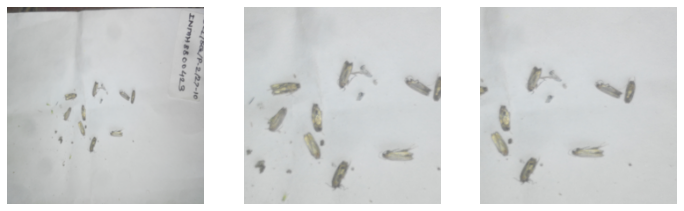

In [ ]:
crop = RandomResizedCrop(224)
_,axs = plt.subplots(1,3,figsize=(12,4))
for ax in axs.flatten():
    cropped = crop(img)
    show_image(cropped, ctx=ax);

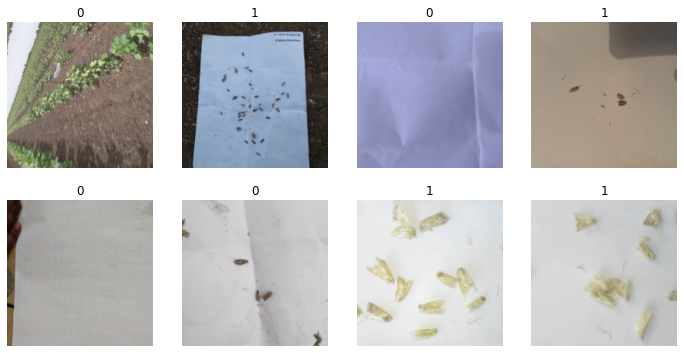

In [ ]:
#Define the image data loader
# Define the augmentation pipeline
transforms = aug_transforms(max_rotate=180, max_zoom=1.15, max_lighting=0.4, max_warp=0.4, p_affine=1., p_lighting=1.)
batch_tfms = [*aug_transforms(size=224, max_warp=.35), Normalize.from_stats(*imagenet_stats)]
item_tfms = RandomResizedCrop(224, min_scale=0.75, ratio=(1.,1.))
bs=8 # batch_size

# Load the images to the image data loader via the augmentation pipeline and receive augmented images
dls = ImageDataLoaders.from_lists(path, train_fnames, labels,  batch_tfms=batch_tfms,  ds_tfms=transforms,
                                   item_tfms=item_tfms, bs = bs)
dls.show_batch()

In [ ]:
#Using the Resnet34 pretrained model
model = resnet34

In [ ]:
roc = RocAucBinary()
learn = vision_learner(dls, model, loss_func=CrossEntropyLossFlat(),
                       ps=0.01, metrics=[accuracy, error_rate, roc]) # ps was used to split the dataset into: Training set(99,5%), Validation set(1,5%).

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
learn.dls.vocab

[0, 1]

In [ ]:
# Find the optimal lr using lr_find()
#learn.lr_find()
# fine tune the model with learning rate and some freeze epochs
#set the freeze_epochs as 1 i.e. number of epochs for which the fine-tuning of the model is done.
#Then we fit the model for 5 epochs
learn.fine_tune(5, base_lr=3e-3, freeze_epochs=5)

epoch,train_loss,valid_loss,accuracy,error_rate,roc_auc_score,time
0,0.544729,0.441604,0.822622,0.177378,0.886579,05:45
1,0.499034,0.620796,0.802057,0.197943,0.857152,05:45
2,0.519943,0.401998,0.879177,0.120823,0.893609,05:41
3,0.401948,0.345053,0.874036,0.125964,0.908856,05:40
4,0.432899,0.365045,0.863753,0.136247,0.915855,05:40


epoch,train_loss,valid_loss,accuracy,error_rate,roc_auc_score,time
0,0.345641,0.445709,0.894602,0.105398,0.896622,05:42


epoch,train_loss,valid_loss,accuracy,error_rate,roc_auc_score,time
0,0.345641,0.445709,0.894602,0.105398,0.896622,05:42
1,0.341616,0.323685,0.884319,0.115681,0.935514,05:41
2,0.272141,0.330361,0.910026,0.089974,0.916859,05:42
3,0.272101,0.267708,0.915167,0.084833,0.932654,05:41


## Final Evaluation

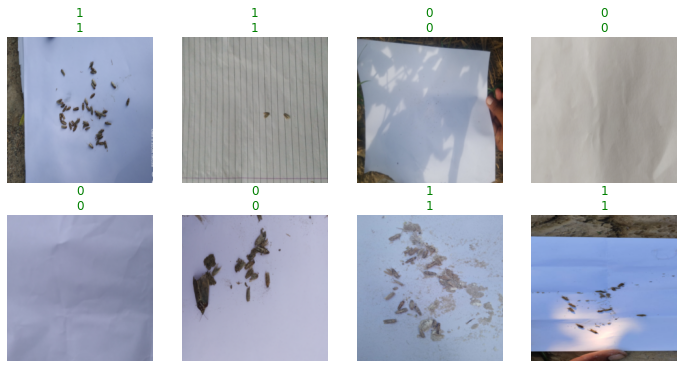

In [ ]:
learn.show_results(ds_idx=1, dl=None, max_n=9, shuffle=True)

## Showing the prediction tensors of a training image

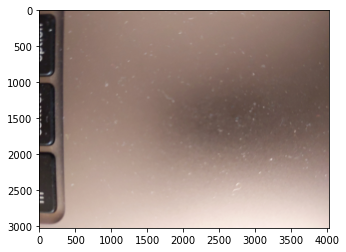

In [ ]:
image = plt.imread(train_fnames[0])
plt.imshow(image)

In [ ]:
learn.predict(train_fnames[0]) # Geting the predicted Label for the image and then the probabilities

('0', TensorBase(0), TensorBase([0.9747, 0.0253]))

In [ ]:
preds = learn.get_preds(dl=dls.test_dl(test_fnames))

In [ ]:
sub['label'] = preds[0][:,1] # To get the predicted probs
sub['image_id'] = [''.join(x.split('/')[-1]) for x in test_fnames]
sub = sub[['image_id', 'label']]
sub.to_csv('/content/dataset/bollworm1st.csv', index=False) # save and submit